# Week 4: An Introduction to PCA

## Goals
- Learn about Python functions
- See PCA in action

### Example from the lecture

Let's look at the example from earlier.

Instead of loading and plotting like we have done before, let's build a Python function to automate this.

#### Python functions (def)

In Python, we use `def` to indicate the start of a function. 

The subsequent lines in the function *must* be indented. The amount of space does not matter, but must be consistent. 

In [2]:
def MyFunction(x):      # first line 'def NAME(<input>):'
    return x + 1        # last line usually 'return <output>' 

Similar to an example from last week "`lambda x: x + 1`"

In [3]:
MyFunction(3)

4

In [4]:
MyFunction(3.1415)
# MyFunction("one")

4.141500000000001

We can make more complicated functions by including more lines.

In [5]:
def GetWord(s, i):                      # Two input variables: s and i
    s_clean = s.replace('.', '')        # Remove '.' from string s
    words = s_clean.split(' ')          # Cut string s_clean into substrings
    return words[i]                     # Output the ith word

In [6]:
GetWord("Nitwit. Blubber. Oddment. Tweak.", 1)

'Blubber'

In [7]:
GetWord("Repetition legitimizes. Repetition legitimizes.", 2)

'Repetition'

---

Back to the goal at hand. We want a function that accomplishes the following.

**INPUT:** a pandas data frame representing two columns (ind. then dep.) of data

**OUTPUT:** a `matplotlib` plot of the data including the mean point.

We will do this in 2 stages.

In [8]:
import pandas as pd

def plot_dataframe(df):
    import matplotlib.pyplot as plt         # locally load matplotlib
    
    print(df)
    pass

df = pd.read_csv("data/pcadata.csv")
plot_dataframe(df)

           x         y
0  -1.112740 -1.563889
1   0.970236 -0.017880
2   0.255869  1.243539
3  -1.533404 -0.448968
4  -0.605709 -1.216509
..       ...       ...
95  1.004005 -1.203509
96 -1.111677 -2.473112
97 -1.390581 -2.872476
98  0.352292  0.382857
99 -0.406286 -1.010982

[100 rows x 2 columns]


Now let's get the column names with `df.columns.values`.

In [9]:
def plot_dataframe(df):
    import matplotlib.pyplot as plt

    cvals = df.columns.values               # get the column headers 
    print(cvals)
    xbar = sum(df[cvals[0]]) / len(df)      # mean of x-values
    ybar = sum(df[cvals[1]]) / len(df)      # mean of y-values
    print("mean : ({0}, {1})".format(xbar, ybar))
    pass

df = pd.read_csv("data/pcadata.csv")
plot_dataframe(df)

['x' 'y']
mean : (-1.92597673920325e-17, -7.452372052796363e-17)


Now we can build the plot within the function.

In [10]:
def plot_dataframe(df):
    import matplotlib.pyplot as plt         # locally load matplotlib

    cvals = df.columns.values               # get the column headers 
    xbar = sum(df[cvals[0]]) / len(df)
    ybar = sum(df[cvals[1]]) / len(df) 
    fig, ax = plt.subplots()
    ax.scatter(df[cvals[0]], df[cvals[1]], c="blue", zorder=2)
    ax.scatter([xbar], [ybar], marker='x', c="red", zorder=3)
    ax.grid()
    ax.set_xlabel(cvals[0])                 
    ax.set_ylabel(cvals[1])
    return fig

Let's load the data for our initial PCA example.

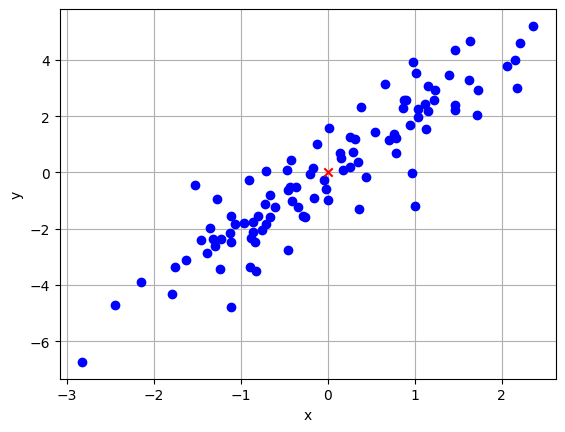

In [11]:
df = pd.read_csv("data/pcadata.csv")
fig = plot_dataframe(df)

**Challenge:** In class, I displayed a graph where the plot's grids were $1\times 1$ squares. Can you achieve this? 

Now let's load the data, build the matrix $X$, and construct its covariance matrix $C_X$. 

Recall that $x_1, \dots, x_n \in \R^m$ are our data points (as column vectors), so
$$ 
\begin{aligned}
    X &= \begin{pmatrix}
        x_1 & x_2 & \cdots & x_n 
    \end{pmatrix}, \\
    C_X &= \dfrac{1}{n} XX^{\mathrm{t}}. 
\end{aligned}
$$

In [12]:
import pandas as pd 
import numpy as np

In [13]:
df = pd.read_csv("data/pcadata.csv")
Z = np.array(df).T                      # Not normalized
print(Z.shape)

(2, 100)


We need the mean to be $(0,0)\in\R^2$, so let's do that.

In [14]:
m1bar = sum(Z[0]) / len(Z[0])
m2bar = sum(Z[1]) / len(Z[1])
M = np.array([
    [m1bar] * len(df),
    [m2bar] * len(df)
])
X = Z - M 

In [15]:
C_X = X @ X.T / len(df)
print(C_X)

[[1.27292656 2.52473203]
 [2.52473203 5.94822583]]


In [16]:
E = np.linalg.eig(C_X)
P = -E.eigenvectors @ np.array([[0,1],[1,0]])
print(P)
print(np.linalg.det(P))

[[ 0.40037618  0.91635087]
 [ 0.91635087 -0.40037618]]
-1.0000000000000002


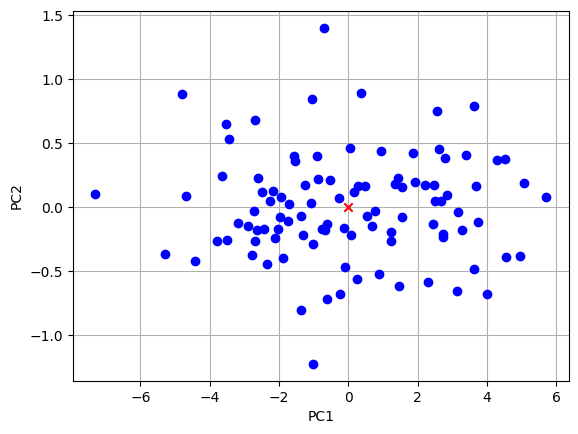

In [17]:
Y = P @ X 
df2 = pd.DataFrame({
    "PC1" : Y[0], 
    "PC2" : Y[1]
})
fig = plot_dataframe(df2)

**Note:** If you think this makes the data look worse, consider 'standardising' the grid in `plot_dataframe`. 

### PCA on some 'real' data

Nothing really is chaning, but perhaps now the data has some context.

If you want some 'real' data sets, one can peruse [kaggle.com]()

We will take some [data concerning sustainability](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy?resource=download) from kaggle. This is provided by [Ansh Tanwar](https://www.kaggle.com/anshtanwar) ([CC BY 4.0](https://creativecommons.org/licenses/by/4.0/))

I cannot provide "hard corded" data, so in order to run these examples, you will need to download something---either on Canvas, GitHub, or Kaggle itself (need an account for Kaggle).

Let's load the data set into Python

In [18]:
df = pd.read_csv("data/global-data-on-sustainable-energy.csv")
print(df.columns.values)
print(df)

['Entity' 'Year' 'Access to electricity (% of population)'
 'Access to clean fuels for cooking'
 'Renewable-electricity-generating-capacity-per-capita'
 'Financial flows to developing countries (US $)'
 'Renewable energy share in the total final energy consumption (%)'
 'Electricity from fossil fuels (TWh)' 'Electricity from nuclear (TWh)'
 'Electricity from renewables (TWh)'
 'Low-carbon electricity (% electricity)'
 'Primary energy consumption per capita (kWh/person)'
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
 'Value_co2_emissions_kt_by_country'
 'Renewables (% equivalent primary energy)' 'gdp_growth' 'gdp_per_capita'
 'Density\\n(P/Km2)' 'Land Area(Km2)' 'Latitude' 'Longitude']
           Entity  Year  Access to electricity (% of population)  \
0     Afghanistan  2000                                 1.613591   
1     Afghanistan  2001                                 4.074574   
2     Afghanistan  2002                                 9.409158   
3     Afghanistan

Take all the rows with `Entity` equal to `Ireland`.

In [19]:
df_ie = df.loc[df["Entity"] == "Ireland"] 
df_ie

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
1597,Ireland,2000,100.0,100.0,NaN,NaN,2.04,22.49,0.0,1.18,...,45993.887,3.12,42530.00000,2.041655,9.399418,26269.18162,73,84421.0,53.41291,-8.24389
1598,Ireland,2001,100.0,100.0,NaN,NaN,1.97,23.61,0.0,1.03,...,47836.670,3.08,44820.00000,1.661700,5.304484,28257.93859,73,84421.0,53.41291,-8.24389
1599,Ireland,2002,100.0,100.0,NaN,NaN,2.25,23.46,0.0,1.38,...,46569.605,2.92,43930.00031,2.228650,5.896232,32550.27907,73,84421.0,53.41291,-8.24389
1600,Ireland,2003,100.0,100.0,NaN,NaN,2.01,23.72,0.0,1.14,...,44674.870,2.77,44090.00015,1.877527,3.009584,41112.74822,73,84421.0,53.41291,-8.24389
1601,Ireland,2004,100.0,100.0,NaN,NaN,2.31,23.83,0.0,1.39,...,44733.043,2.67,44689.99863,2.256778,6.785873,47666.54708,73,84421.0,53.41291,-8.24389
1602,Ireland,2005,100.0,100.0,NaN,NaN,2.89,23.75,0.0,1.87,...,45659.780,2.55,46650.00153,2.884650,5.736211,50914.03129,73,84421.0,53.41291,-8.24389
1603,Ireland,2006,100.0,100.0,NaN,NaN,3.23,24.64,0.0,2.47,...,45880.330,2.44,47259.99832,3.701902,4.980502,54283.68178,73,84421.0,53.41291,-8.24389
1604,Ireland,2007,100.0,100.0,NaN,NaN,3.57,25.56,0.0,2.81,...,45259.535,2.36,46360.00061,4.042659,5.305468,61318.46603,73,84421.0,53.41291,-8.24389
1605,Ireland,2008,100.0,100.0,NaN,NaN,4.21,26.32,0.0,3.60,...,44106.400,2.45,45779.99878,5.176768,-4.486599,61103.51347,73,84421.0,53.41291,-8.24389
1606,Ireland,2009,100.0,100.0,NaN,NaN,5.30,23.85,0.0,4.12,...,39248.785,2.50,40560.00137,6.452941,-5.100471,51927.23096,73,84421.0,53.41291,-8.24389


In [20]:
Z = np.array([
    df_ie["Electricity from fossil fuels (TWh)"],
    df_ie["Electricity from renewables (TWh)"],
    df_ie["Primary energy consumption per capita (kWh/person)"],
    df_ie["gdp_per_capita"]
]).T
print(Z)

[[2.24900000e+01 1.18000000e+00 4.59938870e+04 2.62691816e+04]
 [2.36100000e+01 1.03000000e+00 4.78366700e+04 2.82579386e+04]
 [2.34600000e+01 1.38000000e+00 4.65696050e+04 3.25502791e+04]
 [2.37200000e+01 1.14000000e+00 4.46748700e+04 4.11127482e+04]
 [2.38300000e+01 1.39000000e+00 4.47330430e+04 4.76665471e+04]
 [2.37500000e+01 1.87000000e+00 4.56597800e+04 5.09140313e+04]
 [2.46400000e+01 2.47000000e+00 4.58803300e+04 5.42836818e+04]
 [2.55600000e+01 2.81000000e+00 4.52595350e+04 6.13184660e+04]
 [2.63200000e+01 3.60000000e+00 4.41064000e+04 6.11035135e+04]
 [2.38500000e+01 4.12000000e+00 3.92487850e+04 5.19272310e+04]
 [2.44400000e+01 3.72000000e+00 3.94070600e+04 4.86079405e+04]
 [2.17300000e+01 5.43000000e+00 3.74654000e+04 5.21088332e+04]
 [2.18800000e+01 5.25000000e+00 3.66889570e+04 4.90288274e+04]
 [1.99400000e+01 5.63000000e+00 3.59563000e+04 5.15183881e+04]
 [1.94200000e+01 6.39000000e+00 3.56008550e+04 5.55258973e+04]
 [2.02400000e+01 7.86000000e+00 3.72742800e+04 6.198755

Data are in vastly different scales: 10s, 1s, 10000s, and 10000s. We "rescale".

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Z)
print(scaler.mean_)
X = scaler.transform(Z).T
print(X.T)

[2.24523810e+01 5.10142857e+00 4.10273260e+04 5.48488124e+04]
[[ 0.01762119 -1.0865098   1.1918958  -1.85577906]
 [ 0.54224189 -1.12807028  1.63413447 -1.72664186]
 [ 0.47198019 -1.03109582  1.33005898 -1.44792463]
 [ 0.59376714 -1.09759259  0.87535265 -0.89193246]
 [ 0.64529239 -1.02832512  0.88931325 -0.46637053]
 [ 0.60781948 -0.89533157  1.11171542 -0.25549961]
 [ 1.02470557 -0.72908963  1.16464392 -0.03669598]
 [ 1.45564401 -0.63488587  1.01566297  0.42009807]
 [ 1.81163663 -0.41600065  0.73892888  0.40614042]
 [ 0.65466061 -0.27192431 -0.42682162 -0.18970888]
 [ 0.93102331 -0.38275227 -0.38883813 -0.40524244]
 [-0.33837143  0.09103725 -0.85480572 -0.17791678]
 [-0.26810973  0.04116467 -1.04113971 -0.37791273]
 [-1.17682773  0.14645123 -1.21696576 -0.21625653]
 [-1.42040163  0.35702435 -1.30226692  0.04396557]
 [-1.03630433  0.76431709 -0.90067148  0.46354418]
 [ 0.12067168  0.67011333 -0.60227618  0.517531  ]
 [-0.31495086  1.04692838 -0.67235058  0.95795744]
 [-0.82083511  1.412

In [22]:
C_X = X @ X.T / X.shape[1]
print(C_X)

[[ 1.         -0.77169753  0.74122705 -0.47295281]
 [-0.77169753  1.         -0.78742388  0.88249897]
 [ 0.74122705 -0.78742388  1.         -0.6067099 ]
 [-0.47295281  0.88249897 -0.6067099   1.        ]]


In [23]:
E = np.linalg.eig(C_X)
print(E.eigenvalues)

[3.14306479 0.57359265 0.24915862 0.03418394]


The first principal component is by far the most important (highest value).

First two principal components account for about $93\%$ of our variance.

In [24]:
sum(E.eigenvalues[:2])/4

np.float64(0.9291643590130869)

And the first three PC accont for about $99\%$ of the variance.

In [25]:
sum(E.eigenvalues[:3])/4

np.float64(0.9914540141626627)

Let's see what we can glean. Recall our variables are 
1. Electricity from fossil fuels (TWh)
2. Electricity from renewables (TWh)
3. Primary energy consumption per capita (kWh/person)
4. GDP per capita

Recall the PC1 was most significant, but the first two yield a lot of information.

In [27]:
P = E.eigenvectors.T
# print(P.T @ C_X @ P)        # Sanity check 
print(P)

[[ 0.4748569  -0.54915609  0.49975922 -0.4724185 ]
 [-0.60996691 -0.19038205 -0.29941507 -0.7085518 ]
 [-0.54607577  0.20131373  0.80983255  0.07379215]
 [-0.32288163 -0.78845104 -0.06901145  0.51896996]]


One might make the following conclusions from the first row alone:
- variables (1) and (3) are positively correlated, 
- variables (2) and (4) are positively correlated,
- variables (1) and (2) are negatively correlated.

These findings do not apply to second column for example.